In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

**The dataset contains an airline passenger satisfaction survey.**

**Variables:**
* **Gender:** Gender of the passengers (Female, Male)
 
* **Customer Type:** The customer type (Loyal customer, disloyal customer)
 
* **Age:** The actual age of the passengers
 
* **Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)
 
* **Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)
 
* **Flight distance:** The flight distance of this journey
 
* **Inflight wifi service:** Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
 
* **Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient
 
* **Ease of Online booking:** Satisfaction level of online booking

* **Gate location:** Satisfaction level of Gate location
 
* **Food and drink:** Satisfaction level of Food and drink

* **Online boarding:** Satisfaction level of online boarding

* **Seat comfort:** Satisfaction level of Seat comfort
 
* **Inflight entertainment:** Satisfaction level of inflight entertainment
 
* **On-board service:** Satisfaction level of On-board service

* **Leg room service:** Satisfaction level of Leg room service

* **Baggage handling:** Satisfaction level of baggage handling

* **Check-in service:** Satisfaction level of Check-in service

* **Inflight service:** Satisfaction level of inflight service

* **Cleanliness:** Satisfaction level of Cleanliness

* **Departure Delay in Minutes:** Minutes delayed when departure

* **Arrival Delay in Minutes:** Minutes delayed when Arrival

* **Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [0]:
train_data = pd.read_csv("/dbfs/FileStore/shared_uploads/agusbaffo@gmail.com/train.csv")
test_data = pd.read_csv("/dbfs/FileStore/shared_uploads/agusbaffo@gmail.com/test.csv")

print(train_data.shape)
print(test_data.shape)

(103904, 25)
(25976, 25)

In [0]:
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [0]:
#Dropping the Unnamed and id cols in both training and testing datasets
train_data.drop(['Unnamed: 0','id'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0','id'], axis=1, inplace=True)

train_data.shape

Out[4]: (103904, 23)

In [0]:
train_data['satisfaction'] = train_data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


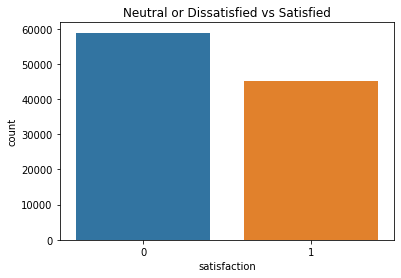

In [0]:
# Check if data is unbalance
sns.countplot(x ='satisfaction', data = train_data)
plt.title('Neutral or Dissatisfied vs Satisfied')
plt.show()

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Gender 103904 non-null object 
 1 Customer Type 103904 non-null object 
 2 Age 103904 non-null int64 
 3 Type of Travel 103904 non-null object 
 4 Class 103904 non-null object 
 5 Flight Distance 103904 non-null int64 
 6 Inflight wifi service 103904 non-null int64 
 7 Departure/Arrival time convenient 103904 non-null int64 
 8 Ease of Online booking 103904 non-null int64 
 9 Gate location 103904 non-null int64 
 10 Food and drink 103904 non-null int64 
 11 Online boarding 103904 non-null int64 
 12 Seat comfort 103904 non-null int64 
 13 Inflight entertainment 103904 non-null int64 
 14 On-board service 103904 non-null int64 
 15 Leg room service 103904 non-null int64 
 16 Baggage handling 103904 non-null int64 
 17 Checkin service 103904 non-null int64 
 18 Inflight service 103904 non-null int64 
 19 Cleanliness 103904 non-null int64 
 20 Departure Delay in Minutes 103904 non-null int64 
 21 Arrival Delay in Minutes 103594 non-null float64
 22 satisfaction 103904 non-null int64 
dtypes: float64(1), int64(18), object(4)
memory usage: 18.2+ MB

In [0]:
#Numercial Columns
numerical_cols = [col for col in train_data.columns if train_data[col].dtypes in ['int64','float64']]
numerical_cols

Out[8]: ['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [0]:
train_data[numerical_cols].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,0.495538
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


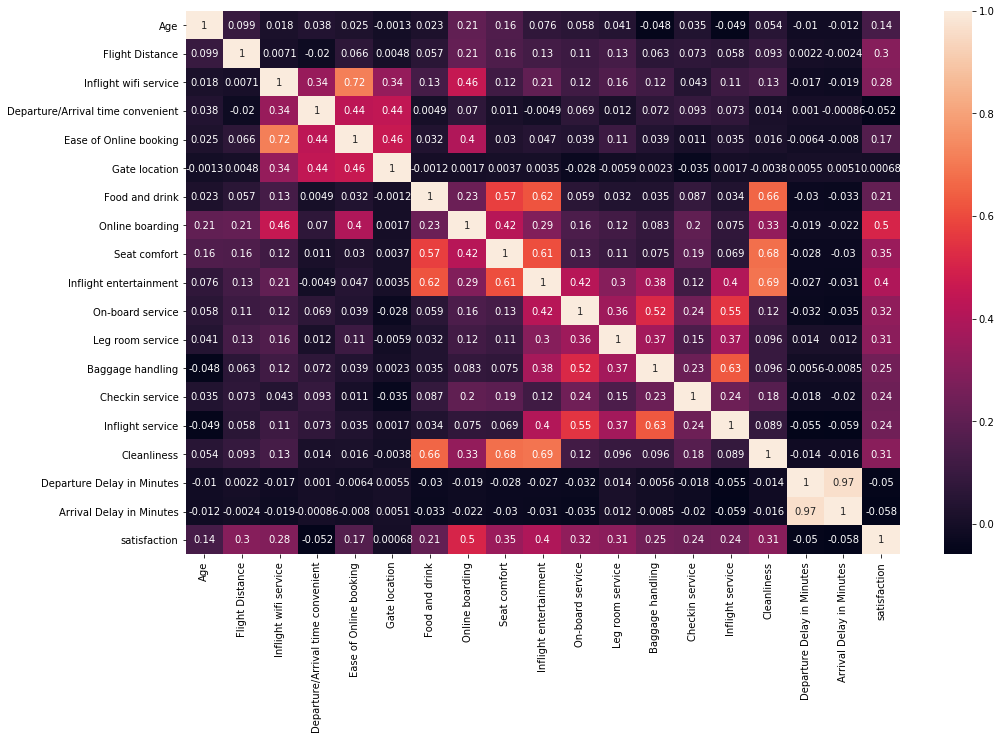

In [0]:
#Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(train_data[numerical_cols].corr(), annot=True)
plt.show()

In [0]:
numerical_cols.remove('satisfaction')
numerical_cols

Out[11]: ['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [0]:
#Categorical Columns
categorical_cols = [col for col in train_data.columns if train_data[col].dtypes in ['object']]
#categorical_cols.append('satisfaction')  #Adding the satisfaction(target) column for EDA
categorical_cols

Out[12]: ['Gender', 'Customer Type', 'Type of Travel', 'Class']

**Notes on the categorical visualisations:**
1. There's no difference in the satisfaction for Male or Female passengers.
2. Loyal Customers were more Satisfied than Disloyal Customers.
3. Business Travel had higher satisfaction rate than personal travel.
4. Business Class had higher satifaction rate than both Economy and Economy Plus.

# **Preprocessing**

In [0]:
train_data.shape

Out[13]: (103904, 23)

In [0]:
train_data.isnull().sum()

Out[14]: Gender 0
Customer Type 0
Age 0
Type of Travel 0
Class 0
Flight Distance 0
Inflight wifi service 0
Departure/Arrival time convenient 0
Ease of Online booking 0
Gate location 0
Food and drink 0
Online boarding 0
Seat comfort 0
Inflight entertainment 0
On-board service 0
Leg room service 0
Baggage handling 0
Checkin service 0
Inflight service 0
Cleanliness 0
Departure Delay in Minutes 0
Arrival Delay in Minutes 310
satisfaction 0
dtype: int64

In [0]:
#Dropping the 310 rows which have null values in the Arrival Delay in Minutes
train_data.dropna(axis=0, inplace=True)
train_data.shape

Out[15]: (103594, 23)

In [0]:
test_data.dropna(axis=0, inplace=True)
test_data.shape

Out[16]: (25893, 23)

In [0]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data[numerical_cols] = sc.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = sc.transform(test_data[numerical_cols])

train_data.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,-1.745542,Personal Travel,Eco Plus,-0.731305,0.203521,0.616249,0.173716,-1.547312,1.352401,-0.185632,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,1.156211,1.305913,0.268966,0.072905,0
1,Male,disloyal Customer,-0.951526,Business travel,Business,-0.956916,0.203521,-0.695032,0.173716,0.017981,-1.656487,-0.185632,-1.849863,-1.769166,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-1.742432,-0.360682,-0.237184,0
2,Female,Loyal Customer,-0.885358,Business travel,Business,-0.047454,-0.549571,-0.695032,-0.541118,-0.764666,1.352401,1.296479,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,0.305580,1.305913,-0.386917,-0.392229,1


In [0]:
#Using PCA to reduce the dimensions of highly correlated features
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)
train_data['PCA1'] = pca1.fit_transform(train_data[['Inflight wifi service', 'Ease of Online booking']])
test_data['PCA1'] = pca1.transform(test_data[['Inflight wifi service', 'Ease of Online booking']])
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,PCA1
0,Male,Loyal Customer,-1.745542,Personal Travel,Eco Plus,-0.731305,0.203521,0.616249,0.173716,-1.547312,1.352401,-0.185632,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,1.156211,1.305913,0.268966,0.072905,0,-0.266747
1,Male,disloyal Customer,-0.951526,Business travel,Business,-0.956916,0.203521,-0.695032,0.173716,0.017981,-1.656487,-0.185632,-1.849863,-1.769166,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-1.742432,-0.360682,-0.237184,0,-0.266747
2,Female,Loyal Customer,-0.885358,Business travel,Business,-0.047454,-0.549571,-0.695032,-0.541118,-0.764666,1.352401,1.296479,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,0.305580,1.305913,-0.386917,-0.392229,1,0.771233
3,Female,Loyal Customer,-0.951526,Business travel,Business,-0.629028,-0.549571,1.271890,1.603383,1.583273,-0.904265,-0.926688,-1.091649,-1.018992,-1.073222,1.253304,-0.534854,-1.821038,0.305580,-0.980345,-0.098328,-0.159662,0,-0.745158
4,Male,Loyal Customer,1.430521,Business travel,Business,-0.977973,0.203521,-0.039391,0.173716,0.017981,0.600179,1.296479,1.182991,-0.268818,-0.296993,0.493081,0.311853,-0.240497,-0.545051,-0.218259,-0.386917,-0.392229,1,-0.266747


In [0]:
pca2 = PCA(n_components=1)
train_data['PCA2'] = pca2.fit_transform(train_data[['Cleanliness', 'Inflight entertainment','Seat comfort','Food and drink']])
test_data['PCA2'] = pca2.transform(test_data[['Cleanliness', 'Inflight entertainment','Seat comfort','Food and drink']])
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,PCA1,PCA2
0,Male,Loyal Customer,-1.745542,Personal Travel,Eco Plus,-0.731305,0.203521,0.616249,0.173716,-1.547312,1.352401,-0.185632,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,1.156211,1.305913,0.268966,0.072905,0,-0.266747,-2.536105
1,Male,disloyal Customer,-0.951526,Business travel,Business,-0.956916,0.203521,-0.695032,0.173716,0.017981,-1.656487,-0.185632,-1.849863,-1.769166,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-1.742432,-0.360682,-0.237184,0,-0.266747,3.507741
2,Female,Loyal Customer,-0.885358,Business travel,Business,-0.047454,-0.549571,-0.695032,-0.541118,-0.764666,1.352401,1.296479,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,0.305580,1.305913,-0.386917,-0.392229,1,0.771233,-2.536105
3,Female,Loyal Customer,-0.951526,Business travel,Business,-0.629028,-0.549571,1.271890,1.603383,1.583273,-0.904265,-0.926688,-1.091649,-1.018992,-1.073222,1.253304,-0.534854,-1.821038,0.305580,-0.980345,-0.098328,-0.159662,0,-0.745158,1.996780
4,Male,Loyal Customer,1.430521,Business travel,Business,-0.977973,0.203521,-0.039391,0.173716,0.017981,0.600179,1.296479,1.182991,-0.268818,-0.296993,0.493081,0.311853,-0.240497,-0.545051,-0.218259,-0.386917,-0.392229,1,-0.266747,-0.623246


In [0]:
# Guardarlo en un archivo pickle
import pickle, time

preprocess_dict = {
    "sc": sc,
    "pca1": pca1,
    "pca2": pca2
}

file_name = "preprocess.pickle"
with open(file_name, 'wb') as handle:
    pickle.dump(preprocess_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

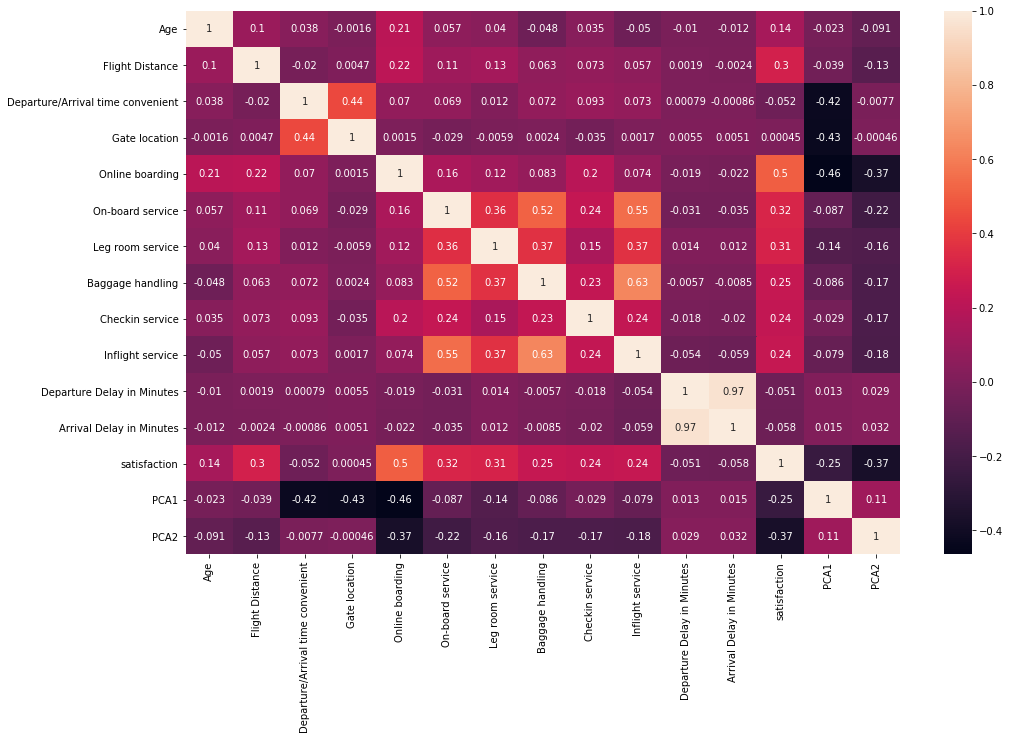

In [0]:
train_data.drop(['Cleanliness','Inflight entertainment','Seat comfort','Food and drink','Inflight wifi service',
                 'Ease of Online booking'], axis=1, inplace=True)
test_data.drop(['Cleanliness','Inflight entertainment','Seat comfort','Food and drink','Inflight wifi service',
                'Ease of Online booking'], axis=1, inplace=True)
#Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [0]:
#Gender either Male or Female had the same satisfaction rates so I dropped the column
train_data.drop('Gender', axis=1, inplace=True)
test_data.drop('Gender', axis=1, inplace=True)

In [0]:
train_data['Class'].value_counts()

Out[23]: Business 49533
Eco 46593
Eco Plus 7468
Name: Class, dtype: int64

In [0]:
#Mapping the Customer Type, Type of Travel and Class Columns in the Training Data
train_data['Customer Type'] = train_data['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer' :1})
train_data['Type of Travel'] = train_data['Type of Travel'].map({'Personal Travel': 0, 'Business travel' :1})
train_data['Class'] = train_data['Class'].map({'Eco': 0, 'Eco Plus' :1, 'Business': 2})

train_data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,PCA1,PCA2
0,1,-1.745542,0,1,-0.731305,0.616249,-1.547312,-0.185632,0.479237,-0.267143,0.311853,0.549773,1.156211,0.268966,0.072905,0,-0.266747,-2.536105
1,0,-0.951526,1,2,-0.956916,-0.695032,0.017981,-0.185632,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-0.360682,-0.237184,0,-0.266747,3.507741
2,1,-0.885358,1,2,-0.047454,-0.695032,-0.764666,1.296479,0.479237,-0.267143,0.311853,0.549773,0.305580,-0.386917,-0.392229,1,0.771233,-2.536105
3,1,-0.951526,1,2,-0.629028,1.271890,1.583273,-0.926688,-1.073222,1.253304,-0.534854,-1.821038,0.305580,-0.098328,-0.159662,0,-0.745158,1.996780
4,1,1.430521,1,2,-0.977973,-0.039391,0.017981,1.296479,-0.296993,0.493081,0.311853,-0.240497,-0.545051,-0.386917,-0.392229,1,-0.266747,-0.623246


In [0]:
#Mapping the Customer Type, Type of Travel and Class Columns in the Testing Data
test_data['Customer Type'] = test_data['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer' :1})
test_data['Type of Travel'] = test_data['Type of Travel'].map({'Personal Travel': 0, 'Business travel' :1})
test_data['Class'] = test_data['Class'].map({'Eco': 0, 'Eco Plus' :1, 'Business': 2})
test_data['satisfaction'] = test_data['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied' :1})

test_data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,PCA1,PCA2
0,1,0.835009,1,0,-1.032120,0.616249,0.800627,0.555423,1.255467,1.253304,1.158561,-1.030767,1.156211,0.924849,0.744766,1,-1.331779,-1.060303
1,1,-0.223679,1,2,1.678219,-1.350673,-1.547312,0.555423,0.479237,0.493081,0.311853,-0.240497,0.305580,-0.386917,-0.392229,1,0.798285,-2.159918
2,0,-1.282366,1,0,-1.000033,-2.006314,0.800627,-0.926688,0.479237,-1.787590,-0.534854,-1.030767,-1.395683,-0.386917,-0.392229,0,0.771233,1.996780
3,1,0.305665,1,2,2.193614,-2.006314,-0.764666,0.555423,-1.849452,-1.787590,-2.228269,-0.240497,-2.246314,-0.386917,-0.237184,1,2.847193,0.470153
4,1,0.636505,1,0,-0.007345,-0.039391,0.017981,-1.667744,-1.073222,-1.027367,-1.381562,0.549773,-1.395683,-0.386917,0.124587,1,-0.239694,0.469557


# **Save preprocessed data**

In [0]:
X_train = train_data.drop('satisfaction', axis=1)
y_train = train_data['satisfaction']

X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data['satisfaction']

X_train.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Departure Delay in Minutes,Arrival Delay in Minutes,PCA1,PCA2
0,1,-1.745542,0,1,-0.731305,0.616249,-1.547312,-0.185632,0.479237,-0.267143,0.311853,0.549773,1.156211,0.268966,0.072905,-0.266747,-2.536105
1,0,-0.951526,1,2,-0.956916,-0.695032,0.017981,-0.185632,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-0.360682,-0.237184,-0.266747,3.507741
2,1,-0.885358,1,2,-0.047454,-0.695032,-0.764666,1.296479,0.479237,-0.267143,0.311853,0.549773,0.305580,-0.386917,-0.392229,0.771233,-2.536105
3,1,-0.951526,1,2,-0.629028,1.271890,1.583273,-0.926688,-1.073222,1.253304,-0.534854,-1.821038,0.305580,-0.098328,-0.159662,-0.745158,1.996780
4,1,1.430521,1,2,-0.977973,-0.039391,0.017981,1.296479,-0.296993,0.493081,0.311853,-0.240497,-0.545051,-0.386917,-0.392229,-0.266747,-0.623246


In [0]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (103594, 17)
X_test shape: (25893, 17)

In [0]:
X_train.to_csv("/dbfs/FileStore/shared_uploads/agusbaffo@gmail.com/X_train_prpro.csv",index=False)
y_train.to_csv("/dbfs/FileStore/shared_uploads/agusbaffo@gmail.com/y_train_prpro.csv",index=False)
X_test.to_csv("/dbfs/FileStore/shared_uploads/agusbaffo@gmail.com/X_test_prpro.csv",index=False)
y_test.to_csv("/dbfs/FileStore/shared_uploads/agusbaffo@gmail.com/y_test_prpro.csv",index=False)